In [ ]:
!nvidia-smi

Wed Sep 20 08:41:26 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:

%%capture
!pip install diffusers["torch"] transformers ftfy accelerate



In [ ]:

import torch
import requests
from PIL import Image
from io import BytesIO
from diffusers import StableDiffusionImg2ImgPipeline

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [ ]:

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print("You are on",DEVICE)



You are on cuda


In [ ]:
device = "cuda"
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
    "nitrosocke/Ghibli-Diffusion", torch_dtype=torch.float16, use_safetensors=True
).to(device)

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


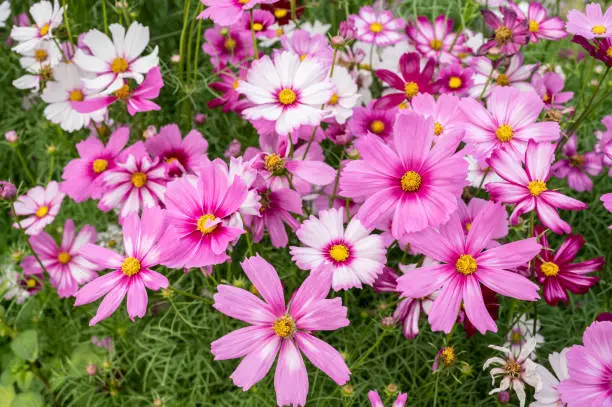

In [ ]:
url = "https://media.istockphoto.com/id/1399843499/photo/full-frame-shot-of-cosmos-flowers-blooming-in-the-nature.webp?b=1&s=612x612&w=0&k=20&c=zZ5VRBDTIrJGB4vHLqrZh9Ao6S05jV8vDBU05jMookA="

response = requests.get(url)
init_image = Image.open(BytesIO(response.content)).convert("RGB")
init_image.thumbnail((768, 768))
init_image


  0%|          | 0/37 [00:00<?, ?it/s]

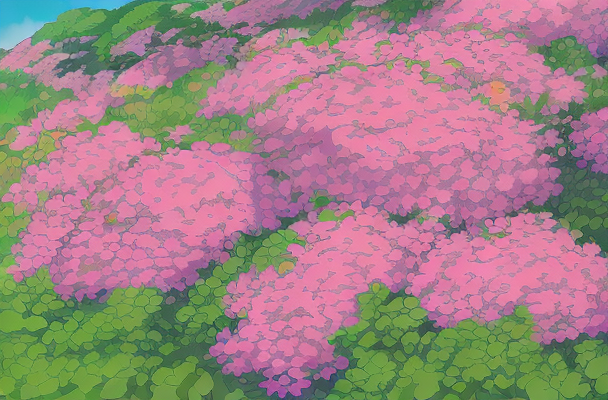

In [ ]:

prompt = "ghibli style, a fantasy landscape with flowers"
generator = torch.Generator(device=device).manual_seed(1024)
image = pipe(prompt=prompt, image=init_image, strength=0.75, guidance_scale=7.5, generator=generator).images[0]
image
